In [6]:
from sklearn.datasets import load_boston
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [9]:
boston = load_boston()
boston.data.shape

(506, 13)

In [12]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data['MEDV'] = boston.target

In [17]:
cols = ['LSTAT',"INDUS","NOX","RM","MEDV"]
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


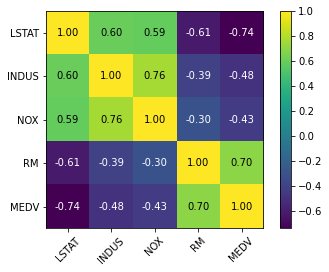

In [18]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(data[cols].values.T)
hm = heatmap(cm,row_names=cols,column_names=cols)

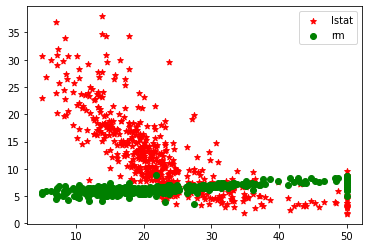

In [20]:
plt.scatter(data['MEDV'],data['LSTAT'],label="lstat",marker="*",color="red")
plt.scatter(data['MEDV'],data['RM'],label="rm",marker="o",color="green")
plt.legend()

In [21]:
class LinearRegressionGD(object):
    def __init__(self,eta=0.001,n_iter=20):
        self.eta=eta
        self.n_iter = n_iter
    
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() /2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)

In [22]:
X = data[['RM']].values
y = data['MEDV'].values

In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

In [26]:
lr  = LinearRegressionGD()
lr.fit(X_std,y_std)

Text(0.5, 0, 'epochs')

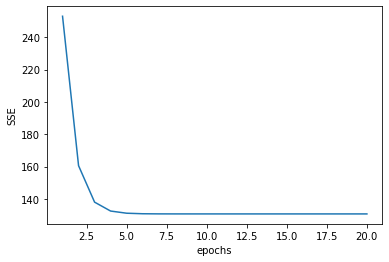

In [27]:
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel("SSE")
plt.xlabel("epochs")

In [28]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c="steelblue",edgecolor="white",s=70)
    plt.plot(X,model.predict(X),color="black",lw=2)
    return

Text(0, 0.5, 'Price')

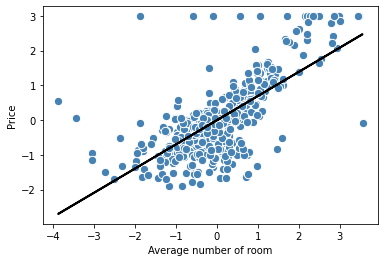

In [30]:
lin_regplot(X_std,y_std,model=lr)
plt.xlabel("Average number of room")
plt.ylabel("Price")

In [36]:
sample = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(sample)
print("Predicted price: {}".format(sc_y.inverse_transform(price_std)))

Predicted price: [10.83993289]


In [39]:
from sklearn.linear_model import LinearRegression
lrr = LinearRegression()
lrr.fit(X,y)
x = np.array([[5.0]])
y_pred = lrr.predict(x)
y_pred

array([10.83992413])

Text(0, 0.5, 'price')

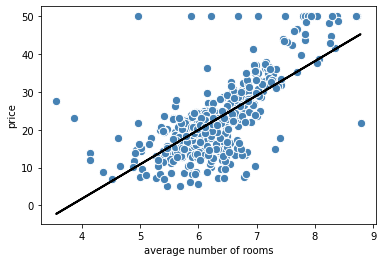

In [40]:
lin_regplot(X,y,model=lrr)
plt.xlabel("average number of rooms")
plt.ylabel("price")

In [43]:
data = pd.read_csv("Datasets/clean_data.csv")
data.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [44]:
data.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

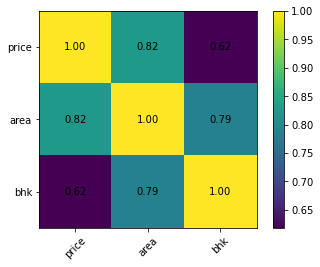

In [49]:
imp = ['price','area','bhk']
cm = np.corrcoef(data[imp].values.T)
hm = heatmap(cm,row_names=imp,column_names=imp)

In [58]:
X = data[['area']].values
y = data['price'].values

In [59]:
linear_ = LinearRegression()
linear_.fit(X,y)

LinearRegression()

Text(0, 0.5, 'price')

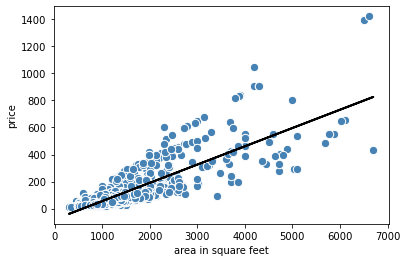

In [60]:
lin_regplot(X,y,linear_)
plt.xlabel("area in square feet")
plt.ylabel("price")